# Name : Ashutosh Chaudhary

# Task 6 : Decision Tree Algorithm Prediction

#### In this task we have ot make prediction on the dataset and visualize the decison tree which we use to make the prediction

In [1]:
# Importing the various libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = pd.read_csv('./Downloads/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop(['Id'], axis= 1, inplace= True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


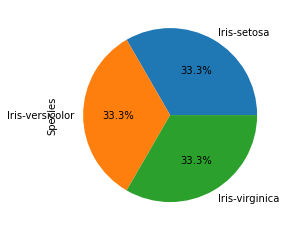

In [8]:
# Plotting the pie chart
iris['Species'].value_counts().plot(kind= 'pie', autopct= '%.1f%%')
plt.show()

#### From this plot we can see that the data is divided equally.

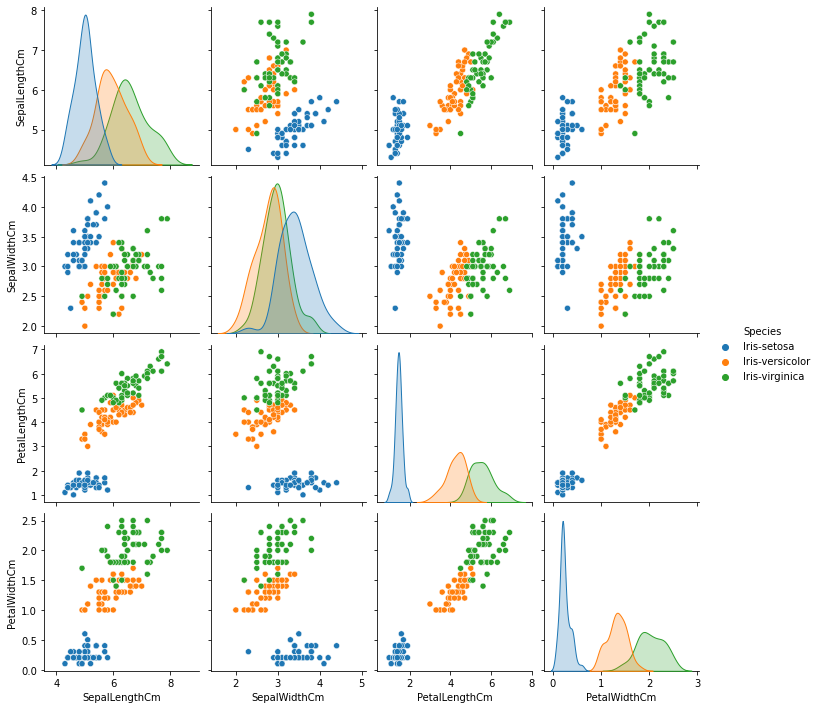

In [9]:
sns.pairplot(iris, hue= 'Species')
plt.show()

### Now Splitting the data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
X = iris.drop(['Species'], axis= 1)
y = iris['Species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

### Now Applying the Decision Tree on the dataset

In [12]:
dtree = DecisionTreeClassifier(criterion= 'entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Now making the Prediction

In [13]:
pred = dtree.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predictions': pred})
df.head()

,Actual,Predictions
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica


### Now Evaluating the Decision Tree Model

In [14]:
from sklearn.metrics import confusion_matrix, recall_score

In [15]:
confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

### Visualizing the Model

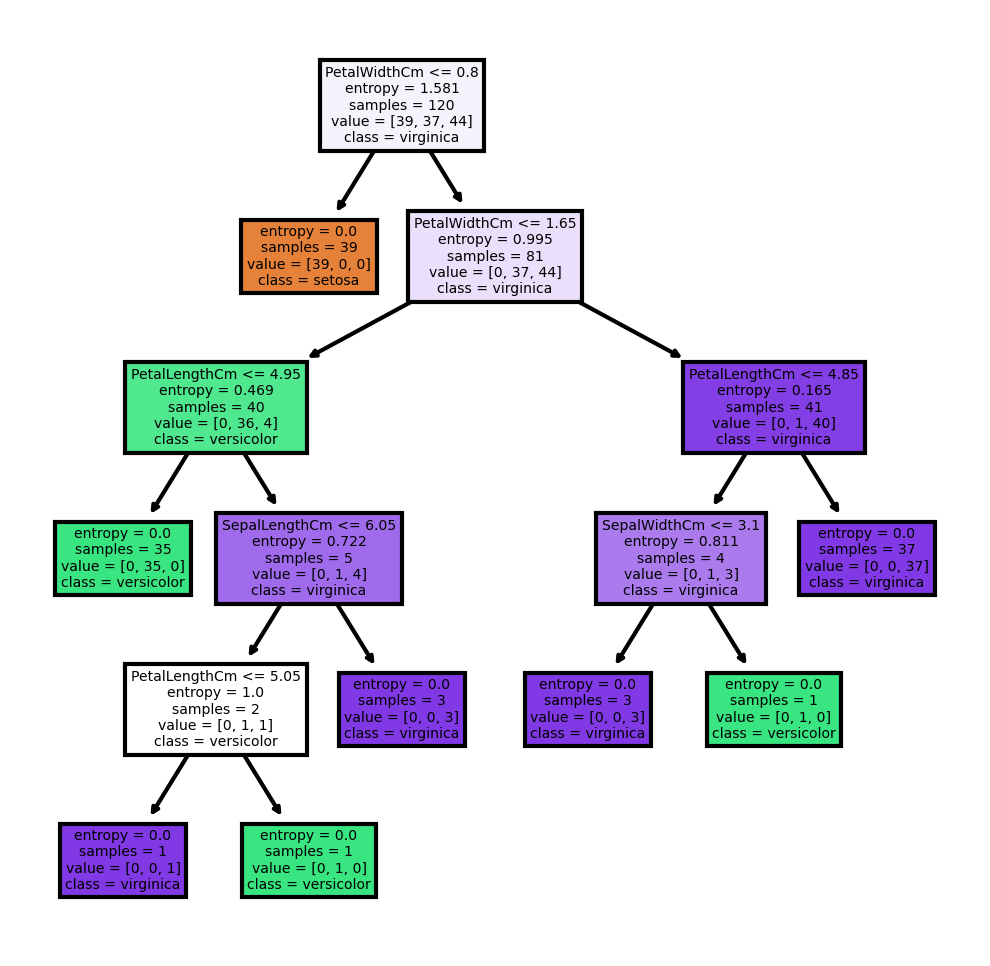

In [16]:
from sklearn import tree
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(dtree,
              feature_names=fn,
              class_names=cn,
              filled=True);
fig.savefig('result_tree.png')

### Hence the Task has been done.